In [1]:
import os
import time as tm
import numpy as np
import pandas as pd
from scHPL import train, predict, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report

from load_dataset import load_dataset
from mlp_generalized import run_mlp
from cnn_generalized import run_cnn
from onehotencode import onehotencode
from split_dataset import split_dataset
from results import result

import scanpy as sc

In [2]:
adata = sc.read('brain_downsampled5000_integrated.h5ad')
groups = adata.obs.groupby('dataset').indices
SA = adata[groups['Saunders']]
X = pd.DataFrame(data = SA.X, index = SA.obs_names, columns=SA.var_names)
Y = pd.DataFrame(data = SA.obs['original2'].values)[0]
print("shape of data: ", X.shape)
print("shape of labels: ", Y.shape)

shape of data:  (389389, 2000)
shape of labels:  (389389,)


In [4]:
# one hot encode labels
ohe, y_dummy = onehotencode(Y)
print(y_dummy.shape)
# split the data into train, validation and test set
x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test = split_dataset(X, y_dummy)

(389389, 11)
shape of train set:  (311511, 2000)  and labels:  (311511, 11) 

shape of test set:  (77878, 2000)  and labels:  (77878, 11) 

Shape of train and validation set to check for overfitting
shape of train set:  (280359, 2000)  and labels:  (280359, 11) 

shape of validation set:  (31152, 2000)  and labels:  (31152, 11)


## Linear SVM performance

In [ ]:
inv_train = ohe.inverse_transform(y_train).ravel()
inv_test = ohe.inverse_transform(y_test).ravel()
print("shape of labels in training set: ", inv_train.shape)
print("shape of labels in test set: ", inv_test.shape)

start = tm.time()
lin_svm = train.svm.LinearSVC()
lin_svm.fit(x_train, inv_train)
training_time = tm.time()-start
print('Training time:', training_time)

start = tm.time()
y_pred = lin_svm.predict(x_test)
test_time = tm.time()-start
print('Predict time:', test_time)

result(inv_test, y_pred)

shape of labels in training set:  (311511,)
shape of labels in test set:  (77878,)


## MLP performance

Train the model to check for overfitting


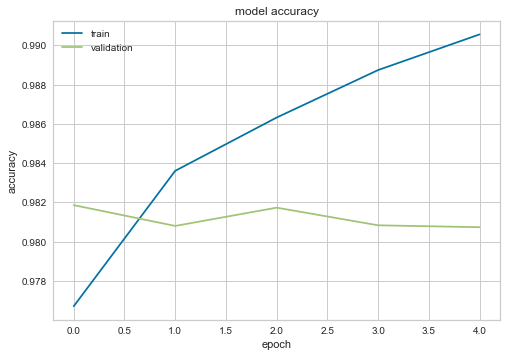

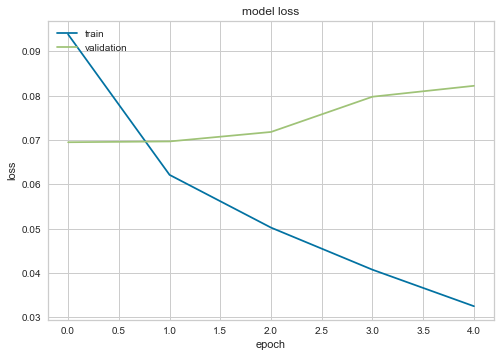

train the final model
Epoch 1/5
9735/9735 [==============================] - 2208s 227ms/step - loss: 0.0315 - accuracy: 0.9915
Epoch 2/5
9735/9735 [==============================] - 646s 66ms/step - loss: 0.0227 - accuracy: 0.9932
Epoch 3/5
9735/9735 [==============================] - 701s 72ms/step - loss: 0.0182 - accuracy: 0.9945
Epoch 4/5
9735/9735 [==============================] - 697s 72ms/step - loss: 0.0152 - accuracy: 0.9953
Epoch 5/5
9735/9735 [==============================] - 874s 90ms/step - loss: 0.0127 - accuracy: 0.9962
Training time: 5401.697624921799
Predict time: 33.07135486602783
The results are as follows:
Accuracy of test set:  0.9810215978838697
F1-score of test set:  0.9808209757977846
Precision of test set: 0.980776519839189
Recall of test set: 0.9810215978838697
Classification report of test set:
                             precision    recall  f1-score   support

        ASTROCYTE-Saunders       0.98      0.98      0.98      7384
ENDOTHELIAL_STALK-Saunders

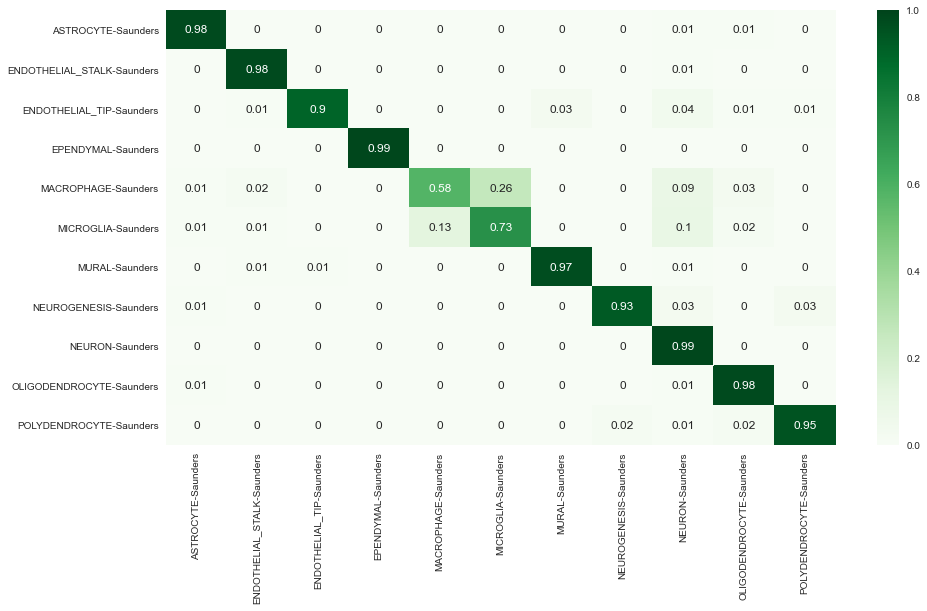

In [4]:
run_mlp(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)

## 1D-CNN performance

Train the model to check for overfitting


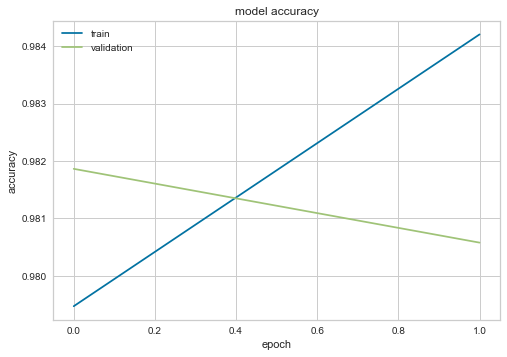

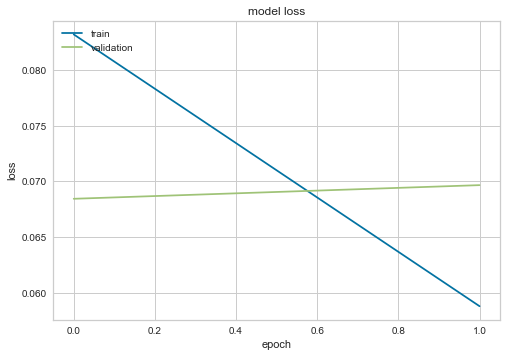

train the final model
Epoch 1/2
9735/9735 [==============================] - 1422s 146ms/step - loss: 0.0445 - accuracy: 0.9874
Epoch 2/2
9735/9735 [==============================] - 1313s 135ms/step - loss: 0.0318 - accuracy: 0.9904
Training time: 3067.1853969097137
Predict time: 65.31351590156555
The results are as follows:
Accuracy of test set:  0.982228613985978
F1-score of test set:  0.9818319193098509
Precision of test set: 0.9816964352777661
Recall of test set: 0.982228613985978
Classification report of test set:
                             precision    recall  f1-score   support

        ASTROCYTE-Saunders       0.98      0.99      0.98      7384
ENDOTHELIAL_STALK-Saunders       0.98      0.98      0.98      5279
  ENDOTHELIAL_TIP-Saunders       0.96      0.91      0.93       844
        EPENDYMAL-Saunders       1.00      0.99      0.99       416
       MACROPHAGE-Saunders       0.68      0.45      0.54       340
        MICROGLIA-Saunders       0.83      0.80      0.82      1

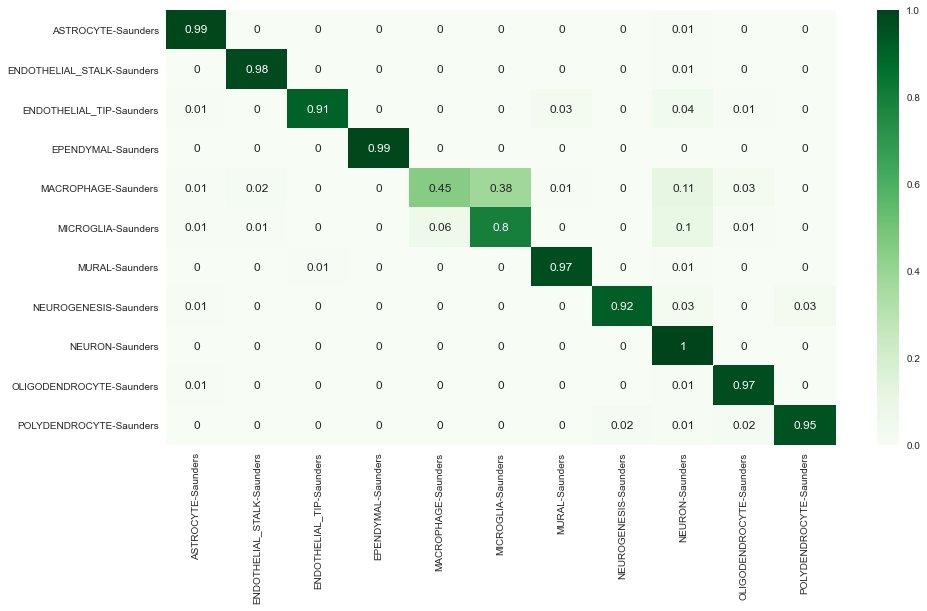

In [4]:
x_tr = np.expand_dims(x_tr,axis=-1)
x_val = np.expand_dims(x_val,axis=-1)
x_test = np.expand_dims(x_test,axis=-1)
x_train = np.expand_dims(x_train,axis=-1)
run_cnn(x_tr, y_tr, x_val, y_val, x_train, y_train, x_test, y_test, ohe)